# Predicting Car Prices

This project will look to use the basic machine learning algorithms such as K-nearest neighnours algorithm. 

We will use this to make predictions of the car prices with attributes given in the dataset using 2 different methods namely 
1. **k-fold cross-validation**
2. **holdout validation**

Information about the dataset

1. symboling: Values range from (-3,+3), -3 indicates the car is safe and +3 indicates the car is risky
2. normalized-losses: continuous from 65 to 256.
3. make: Brand of the car, eg:- audi, bmw etc:-
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
import pandas as pd 
import numpy as np
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=col_names)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


By observing the columns name, we see the some of them haven't been named, we will rename the columns by referring the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). 


In [2]:
cars = cars.replace("?", np.nan)
def norm_doors(door):
    if door == "four":
        return 4
    if door == "two":
        return 2
    
cars["num-of-doors"] = cars["num-of-doors"].apply(norm_doors)


In [3]:
cars["num-of-doors"].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [4]:
print(cars["num-of-cylinders"].value_counts())
def norm_cylinders(cylinders):
    if cylinders =='four':
        return 4
    if cylinders =="six":
        return 6 
    if cylinders =="five":
        return 5
    if cylinders =="eight":
        return 8 
    if cylinders =="two":
        return 2 
    if cylinders =="twelve":
        return 12 
    if cylinders =="three":
        return 3 


four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


In [5]:
cars["num-of-cylinders"] = cars["num-of-cylinders"].apply(norm_cylinders)

In [6]:
cars["num-of-cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [7]:
cars["horsepower"] = cars["horsepower"].astype("float")
cars["peak-rpm"]= cars["peak-rpm"].astype("float")
cars["price"] = cars["price"].astype("float")
cars["bore"]= cars["bore"].astype("float")
cars["stroke"]= cars["stroke"].astype("float")
cars["normalized-losses"]= cars["normalized-losses"].astype("float")
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null float64
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

In [8]:
numeric_cols = cars.select_dtypes([int, float]).columns
numeric_cars = cars[numeric_cols]
numeric_cars = numeric_cars.dropna(subset=['price'])

In [9]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
numeric_cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
for i in numeric_cars.columns.drop('price'):
    numeric_cars[i] = (numeric_cars[i] - min(numeric_cars[i]))/(max(numeric_cars[i]) - min(numeric_cars[i]))
numeric_cars.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


Dataset is cleaned and normalized.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(df,train_col,target_col):
    df = df.sample(frac = 1)
    train_set = df[:int(len(df)/2)]
    test_set = df[int(len(df)/2):]
    knn = KNeighborsRegressor()
    knn.fit(train_set[[train_col]],train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    mse = mean_squared_error(predictions, test_set[target_col])
    rmse = mse ** 0.5
    return rmse
cols = {}
for i in numeric_cars.columns:
    if i!="price":
        val = knn_train_test(numeric_cars,i,"price")
        cols[i] = val
sers = pd.Series(cols)
def_k_val_features = sers.sort_values()
def_k_val_features

highway-mpg          4052.878359
engine-size          4090.502403
curb-weight          4343.055714
width                4719.421260
city-mpg             4791.196576
horsepower           4811.087714
num-of-cylinders     5457.987771
wheel-base           5490.459308
length               5602.328195
compression-rate     6337.880729
bore                 6542.832622
stroke               6712.118363
height               6714.428024
peak-rpm             6773.708512
num-of-doors         8568.630438
normalized-losses    8705.352473
symboling            8745.045255
dtype: float64

This is a Univarate holdout model, so we will split the dataset into 2 halves, 
1. Train
2. Test

We will use the train dataset to train the algorithm and use the test dataset to test our efficiency by verifying the RMSE(Root Mean Squared Error). 

We have taken a default K value in the function above(default K value is 5).


This is a Multivarate model with different k values.
Let us try by using K value = 1,3,5,7,9

In [13]:
def knn_train_test_1(df,train_col,target_col):
    df = df.sample(frac = 1)
    train_set = df[:int(len(df)/2)]
    test_set = df[int(len(df)/2):]
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
       
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])
        predicted_labels = knn.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
b = { }
for i in numeric_cars.columns.drop('price'):
    x = knn_train_test_1(numeric_cars,i,"price")
    b[i] = x
b

{'bore': {1: 6173.386638155625,
  3: 6143.483649081737,
  5: 6429.764953374545,
  7: 6756.596204312863,
  9: 6413.3521051336675},
 'city-mpg': {1: 5265.802988045688,
  3: 3869.1971442734894,
  5: 3793.6107846412674,
  7: 3970.857403393436,
  9: 4064.9738188159604},
 'compression-rate': {1: 8692.761431043054,
  3: 6638.485317301742,
  5: 7177.364790191811,
  7: 7158.471270522438,
  9: 7658.0644384628895},
 'curb-weight': {1: 6082.1847511017495,
  3: 4796.470860556918,
  5: 4185.229274389627,
  7: 3668.671977377022,
  9: 3602.408729441217},
 'engine-size': {1: 3735.399501478197,
  3: 3583.6305729815904,
  5: 4031.16703388107,
  7: 4472.449563087604,
  9: 4482.392033366742},
 'height': {1: 10006.480371526373,
  3: 8719.682228316366,
  5: 8381.722103304886,
  7: 8272.341592176917,
  9: 8291.614531909741},
 'highway-mpg': {1: 6474.144192841473,
  3: 4354.262873256154,
  5: 3979.307864838848,
  7: 4093.6608657156266,
  9: 3965.7459294003484},
 'horsepower': {1: 3623.9651278019705,
  3: 3621.

In [30]:
def knn_train_test_2(df,train_col,target_col):
    df = df.sample(frac = 1)
    train_set = df[:int(len(df)/2)]
    test_set = df[int(len(df)/2):]
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col],train_set[target_col])
    predictions = knn.predict(test_set[train_col])
    mse = mean_squared_error(predictions, test_set[target_col])
    rmse = mse ** 0.5
    return rmse
mul_feat_norm = {}
for i in range(2,6):
    n_features = def_k_val_features.index[:i]
    n = knn_train_test_2(numeric_cars,n_features,"price")
    mul_feat_norm[len(n_features)] = n

mul_feat_norm

{2: 4373.151495158149,
 3: 4355.068241999802,
 4: 4156.900129511494,
 5: 4029.8097553306934}

These are the RMSE values for a default k value of 5 for the best features.

The RMSE values for multiple features  is lower than the RMSE values for a single feature. 


This is with a deafult K value of 5

These are the 5 best features:-
1. engine-size          
2. horsepower           
3. city-mpg             
4. width                
5. curb-weight      

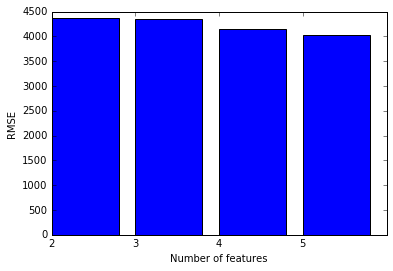

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(list(dic.keys()),list(dic.values()))
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.xticks([2,3,4,5])
plt.show()


Not really a lot of difference between the rmse values when we take multiple features. Let us make an observation for the same set of features with multiple k values ranging from 1-25.

In [16]:
def knn_train_test_3(df,train_col,target_col):
    df = df.sample(frac = 1)
    train_set = df[:int(len(df)/2)]
    test_set = df[int(len(df)/2):]
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col], train_set[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_set[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_set[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

dic_1 = {}
for i in range(2,6):
    n_features = def_k_val_features.index[:i]
    n = knn_train_test_3(numeric_cars,n_features,"price")
    dic_1[len(n_features)] = n
dic_1    


{2: {1: 3264.461370517954,
  2: 3732.5260800319684,
  3: 3746.896527602391,
  4: 3757.151474995965,
  5: 3849.947222526255,
  6: 3996.4411855224307,
  7: 4229.404249145194,
  8: 4167.215469010559,
  9: 4248.604704643144,
  10: 4407.304945168075,
  11: 4537.798765511954,
  12: 4698.196769320207,
  13: 4859.322708785537,
  14: 4977.441071375325,
  15: 5067.079749045826,
  16: 5128.109786968131,
  17: 5205.053731924554,
  18: 5275.124238021465,
  19: 5380.037086971091,
  20: 5426.1331748436305,
  21: 5508.990654228626,
  22: 5571.1916628405825,
  23: 5639.257801687554,
  24: 5704.260743400119},
 3: {1: 2919.574540074205,
  2: 2314.723662484005,
  3: 2573.299118687026,
  4: 2729.454056316859,
  5: 2835.596935216622,
  6: 3159.4979948099226,
  7: 3231.0302690496496,
  8: 3256.7123555513376,
  9: 3371.674824093073,
  10: 3334.300506526336,
  11: 3298.7212402012365,
  12: 3304.8179341741434,
  13: 3254.1049312832884,
  14: 3350.6053030908342,
  15: 3371.522006570931,
  16: 3494.0949014398043,

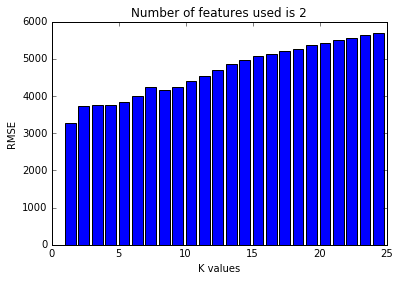

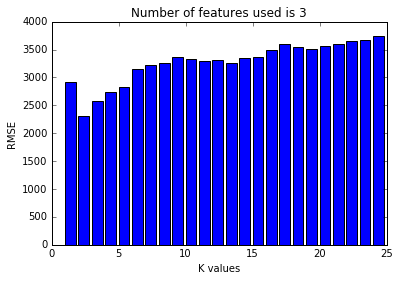

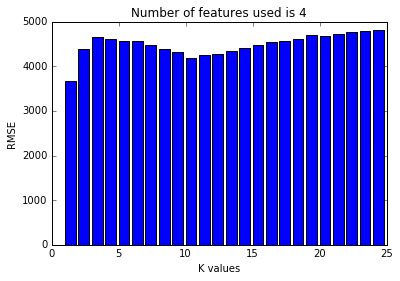

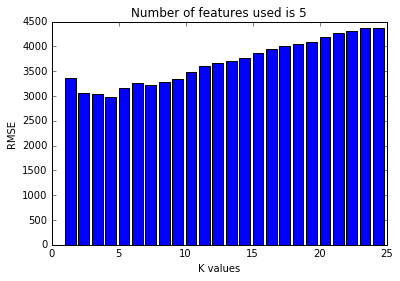

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in dic_1:
    plt.bar(list(dic_1[i].keys()),list(dic_1[i].values()))
    plt.title("Number of features used is {}".format(i))
    plt.xlabel("K values")
    plt.ylabel("RMSE")
    plt.show()


We have ploted the graph for 2,3,4 and 5 features by taking k values over a range of 1-25. 

- Graph1 - 2 features
- Graph2 - 3 features
- Graph3 - 3 features
- Graph4 - 3 features




1. Common conclusion that we can draw from all the 4 graphs is that higher the K value goes, higher the RMSE value. Thus meaning we have to take a lower K value for a more precise model
2. Of the 4 graphs, only graphs 1 and 2 (i.e with 2 and 3 features respectievely) have the lowest RMSE values for K values between 1-6.


** 2 OR 3 FEATURES WITH A K VALUE OF PREFERBBLY BETWEEN 4-7 WOULD YIELD US THE MOST PRECISE PREDICTION OF THE CAR PRICE**

In [18]:
k_fold_cars = numeric_cars
k_fold_cars["fold"] = 0

# k_fold_cars["fold"][0:40] = 1
# k_fold_cars["fold"][40:80] = 2
# k_fold_cars["fold"][80:120] = 3
# k_fold_cars["fold"][120:160] = 4
# k_fold_cars["fold"][160:] = 5
for i in range(4):
    k_fold_cars["fold"][i*40:(i+1)*40] = i+1
k_fold_cars["fold"][160:] = 5
k_fold_cars["fold"].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


5    41
4    40
3    40
2    40
1    40
Name: fold, dtype: int64

In [19]:
def k_fold_knn_predict(df,train_col,target_col):
    k_fold_rmse = [ ]
    for i in range(1,6):
        train_k_fold = df[df["fold"]!=i]
        test_k_fold = df[df["fold"]==i]
        knn = KNeighborsRegressor()
        knn.fit(train_k_fold[[train_col]],train_k_fold[target_col])
        predictions = knn.predict(test_k_fold[[train_col]])
        mse = mean_squared_error(predictions, test_k_fold[target_col])
        rmse = mse ** 0.5
        k_fold_rmse.append(rmse)
    mean_rmse = sum(k_fold_rmse)/len(k_fold_rmse)
    return mean_rmse

In [20]:
# k_fold_knn_predict(k_fold_cars,,target_col)
k_fold_dic = { }
for i in k_fold_cars.columns.drop(['price','fold']):
    val = k_fold_knn_predict(k_fold_cars,i,"price")
    k_fold_dic[i] = val

k_fold_ser = pd.Series(k_fold_dic)
def_k_fold_features = k_fold_ser.sort_values()
def_k_fold_features

engine-size           4436.445497
horsepower            4468.596964
highway-mpg           4873.051624
city-mpg              4978.234617
curb-weight           5143.365608
width                 5897.572627
compression-rate      6778.202781
length                7580.002378
num-of-doors          7662.326545
num-of-cylinders      7836.558130
wheel-base            8077.909862
symboling             8251.351687
bore                  8429.920548
height                9431.417840
peak-rpm              9472.128403
stroke                9558.937793
normalized-losses    10319.870428
dtype: float64

In [21]:
from sklearn.model_selection import cross_val_score, KFold
def k_diff_fold_knn_predict(df,train_col,target_col):
    num_folds = [4,5,10,15,20]
    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor()
        mses = cross_val_score(model, df[[train_col]], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
    return avg_rmse

In [22]:
avg = {}
for i in k_fold_cars.columns.drop(['price','fold']):
    vals_1 = k_diff_fold_knn_predict(k_fold_cars,i,"price")
    avg[i] = vals_1

In [23]:
avg_sers = pd.Series(avg)
avg_k_val_features = avg_sers.sort_values()
avg_k_val_features

engine-size          2986.658115
horsepower           3575.380904
width                3940.192451
highway-mpg          3943.453963
curb-weight          3992.474958
city-mpg             4096.593822
length               5056.619952
wheel-base           5519.869651
compression-rate     5848.134367
bore                 6442.234794
normalized-losses    6741.285411
height               7231.594248
peak-rpm             7399.420791
stroke               7574.554139
symboling            7673.470802
num-of-doors         8237.496213
num-of-cylinders     8345.156648
dtype: float64

We have only taken 1 feature, so this study is extremely biased(**HIGH**), ideally we would need to have low bias, but this would mean our variance would be high. 

So we would have a tradeoff here, we will look at the same study with a few more features to reduce the bias and unfortunately increase the variance. 

From the above study let us take a 2,3,4,5 best features and see how our study holds up. 
5 best features to base this study off are the following with the default k value:
1. engine-size          
2. horsepower           
3. width                
4. highway-mpg          
5. curb-weight         

In [24]:
def knn_multiple_features(df,train_col,target_col):
    num_folds = [4,5,10,15,20]
    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor()
        mses = cross_val_score(model, df[train_col], df[target_col], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    return avg_rmse
dic_mul_feat = {}
for i in range(2,6):
    n_mul_features = avg_k_val_features.index[:i]
    n = knn_multiple_features(k_fold_cars,n_mul_features,"price")
    dic_mul_feat[len(n_mul_features)] = n

dic_mul_feat

{2: 2681.1790655064788,
 3: 2821.041717486002,
 4: 2829.686125360334,
 5: 2811.005684713027}

With the k-fold cross-validation, for multiple features we can see that the RMSE values are significantly lower than compared to the handout validation model. 

Also we can see a clear reduction in RMSE values when we use multiple features that are relevant in comparison to just 1 feature. 

From all of above analysis, the following features seem like the most relevant features and affect the price of the car.
1. engine-size           
2. horsepower            
3. highway-mpg           
4. city-mpg              
5. curb-weight


